# Лабораторная работа №5

## Вариант 10 – Уровень преступности в городах США
## Кластеризация
### Данные:

Датасет – crime.csv
Набор данных содержит список городов и количество преступлений на 100 000
человек населения по состоянию на 1970 год.

Атрибуты:
• City – город
• Murder – количество убийств, совершенных с применением насилия.
• Rape – количество изнасилований
• Robbery – количество грабежей
• Assault – количество нападений
• Burglary – количество краж со взломом
• Larceny – количество краж
• Auto – количество угонов автомобилей.


## Задание 1: Загрузить набор данных как датафрейм библиотеки pandas. Использовать набор данных для задания 5

In [95]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as pt
%matplotlib inline

df = pd.read_csv('crime.csv')

## Задание 2: Получить представлении о наборе данных с помощью методов shape, head, describe, info библиотеки pandas

In [96]:
df.shape

(16, 8)

In [97]:
df.head()

,City,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto
0,Atlanta,16.5,24.8,106,147,1112,905,494
1,Boston,4.2,13.3,122,90,982,669,954
2,Chicago,11.6,24.7,340,242,808,609,645
3,Dallas,18.1,34.2,184,293,1668,901,602
4,Denver,6.9,41.5,173,191,1534,1368,780


In [98]:
df.describe()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,9.750000,28.118750,243.500000,196.250000,1375.687500,1003.562500,689.125000
std,4.909582,12.058647,157.221288,84.449196,305.050098,261.586689,150.850423
min,2.500000,8.800000,42.000000,28.000000,808.000000,609.000000,468.000000
25%,5.075000,22.025000,118.000000,146.250000,1098.000000,779.250000,575.000000
50%,10.000000,25.700000,219.500000,204.000000,1495.000000,979.000000,718.000000
75%,12.625000,36.700000,301.750000,248.250000,1542.000000,1207.500000,782.000000
max,18.100000,51.800000,524.000000,355.000000,1902.000000,1392.000000,954.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      16 non-null     object 
 1   Murder    16 non-null     float64
 2   Rape      16 non-null     float64
 3   Robbery   16 non-null     int64  
 4   Assault   16 non-null     int64  
 5   Burglary  16 non-null     int64  
 6   Larceny   16 non-null     int64  
 7   Auto      16 non-null     int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 1.1+ KB


## Задание 3. Произвести разведочный анализ данных по датасету – визуализировать данные с помощью библиотек matplotlib, seaborn. На основе выполненного анализапроизвести выводы о распределении значений признаков.


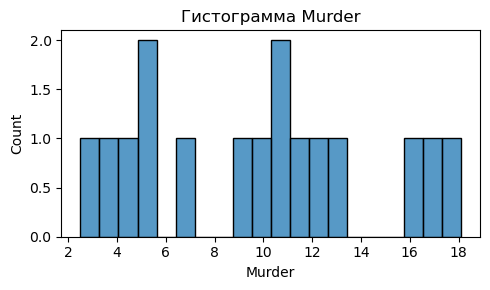

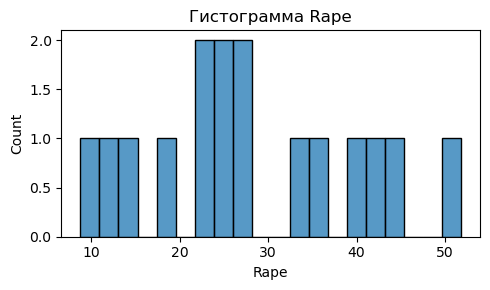

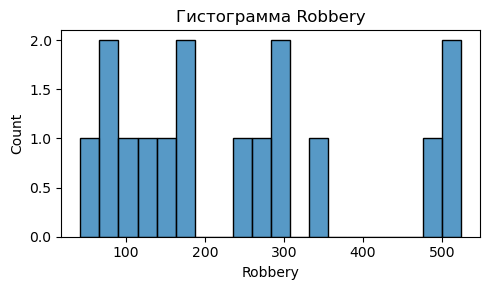

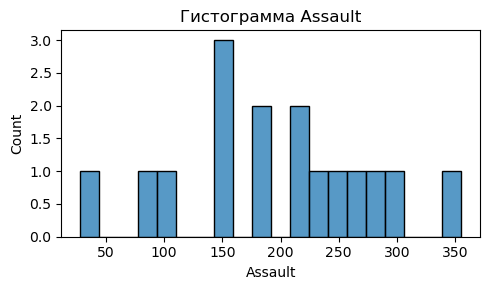

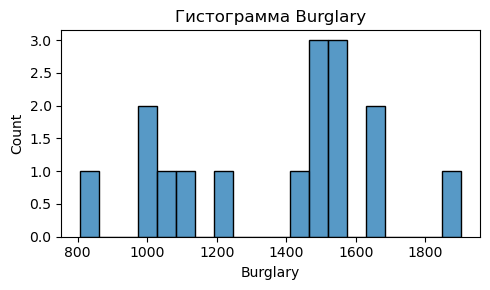

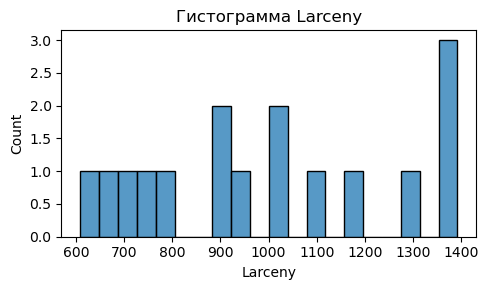

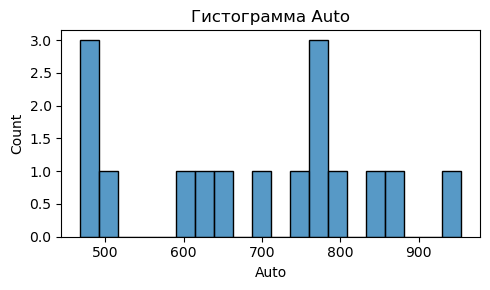

In [100]:
num_cols = ['Murder', 'Rape', 'Robbery', 'Assault', 'Burglary', 'Larceny', 'Auto']

for col in num_cols:
    pt.figure(figsize=(5,3))
    sns.histplot(df[col], bins=20)
    pt.title(f'Гистограмма {col}')
    pt.tight_layout()
    pt.show()

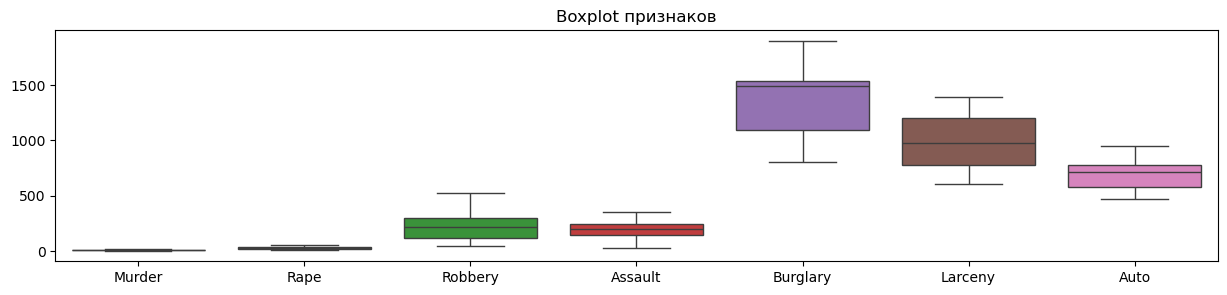

In [101]:
pt.figure(figsize=(15,3))
sns.boxplot(data=df[num_cols])
pt.title('Boxplot признаков')
pt.show()

Можно сделать вывод что Burglary и Larcency самые частовстречающиеся преступления, а Murder и Rape самые редкие

## Задание 4 Произвести предобработку данных:
- закодировать категориальные признаки в дискретные величины с помощью
методов библиотеки sklearn;
- произвести нормализацию данных с помощью методов библиотеки sklearn. 

In [102]:
print(df.isnull().sum())

City        0
Murder      0
Rape        0
Robbery     0
Assault     0
Burglary    0
Larceny     0
Auto        0
dtype: int64


Видно что пропущенных значений нет

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

Уберем некатегориальный признак:

In [104]:
y = df['City']
df.drop('City', axis = 1, inplace = True)
df.head()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto
0,16.5,24.8,106,147,1112,905,494
1,4.2,13.3,122,90,982,669,954
2,11.6,24.7,340,242,808,609,645
3,18.1,34.2,184,293,1668,901,602
4,6.9,41.5,173,191,1534,1368,780


In [105]:
X = scaler.fit_transform(df)
X[:5]

array([[ 1.41995171, -0.28424336, -0.9032453 , -0.60231694, -0.89275591,
        -0.38914408, -1.33592091],
       [-1.16751585, -1.26919211, -0.79814039, -1.29941472, -1.33289156,
        -1.32091838,  1.81346342],
       [ 0.38917195, -0.29280813,  0.63391397,  0.55951269, -1.9219962 ,
        -1.55781014, -0.30210127],
       [ 1.75653286,  0.52084518, -0.39085888,  1.18323176,  0.9896704 ,
        -0.40493687, -0.59650024],
       [-0.59953517,  1.14607352, -0.4631185 , -0.06420637,  0.53599211,
         1.43887074,  0.62217457]])

## Задание 5: Произвести обучение модели библиотеки sklearn, реализующей метод kсредних (k-means clustering)

Сначала определим оптимальное количество кластеров с помощью метода локтя 

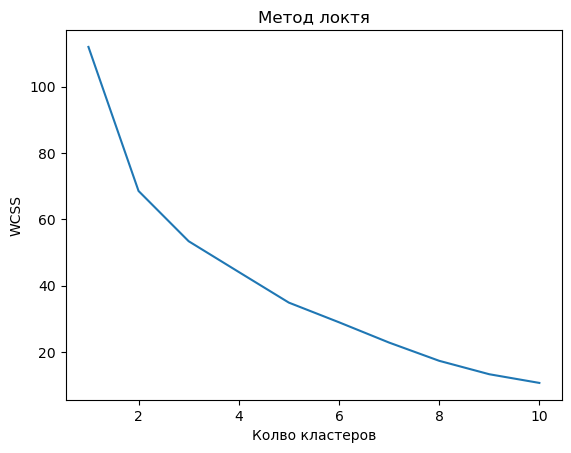

In [106]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

pt.plot(range(1,11), wcss)
pt.title('Метод локтя')
pt.xlabel('Колво кластеров')
pt.ylabel('WCSS')
pt.show()

Исходя из графиков оптимальное значение = 3

In [107]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)

kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [108]:
clusters = kmeans.predict(X)
df['cluster'] = clusters
df.head()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto,cluster
0,16.5,24.8,106,147,1112,905,494,1
1,4.2,13.3,122,90,982,669,954,2
2,11.6,24.7,340,242,808,609,645,1
3,18.1,34.2,184,293,1668,901,602,0
4,6.9,41.5,173,191,1534,1368,780,0


## Задание 6: Произвести снижение размерности набора данных с помощью метода PCA

Сначала сделаем попарное сравнение признаков:

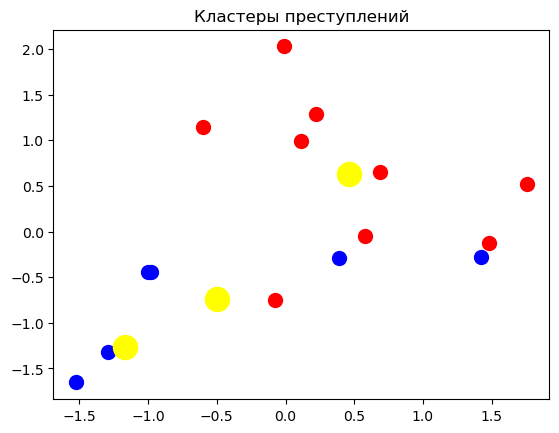

In [109]:
pt.scatter(X[clusters == 0, 0],X[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
pt.scatter(X[clusters == 1, 0],X[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
pt.scatter(X[clusters == 2, 0],X[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 2')

pt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
          s = 300, c = 'yellow', label = 'Centroids')
pt.title('Кластеры преступлений')
pt.show()


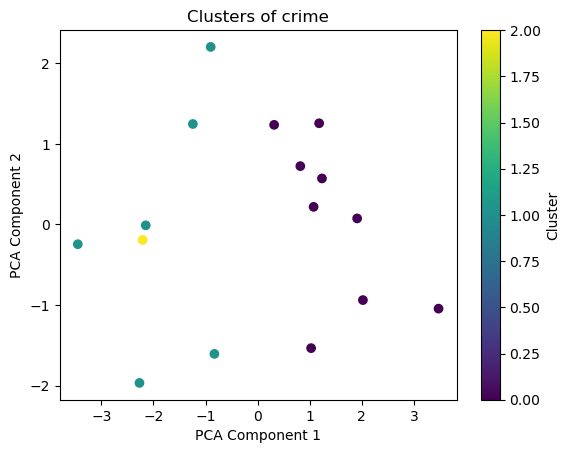

In [110]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


pt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
pt.title('Clusters of crime')
pt.xlabel('PCA Component 1')
pt.ylabel('PCA Component 2')
pt.colorbar(label='Cluster')
pt.show()

## Задание 7: Произвести разведочный анализ данных по кластерам для оценки качества обучения модели

Среднее значение каждого кластера

In [111]:

cluster_groups = df.groupby('cluster')
cluster_groups.mean()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto
cluster,,,,,,,
0,11.944444,35.522222,330.666667,248.666667,1544.333333,1112.333333,761.888889
1,7.383333,19.483333,133.000000,135.333333,1188.333333,896.166667,535.833333
2,4.200000,13.300000,122.000000,90.000000,982.000000,669.000000,954.000000


In [112]:
df['City'] = y

df.head()

,Murder,Rape,Robbery,Assault,Burglary,Larceny,Auto,cluster,City
0,16.5,24.8,106,147,1112,905,494,1,Atlanta
1,4.2,13.3,122,90,982,669,954,2,Boston
2,11.6,24.7,340,242,808,609,645,1,Chicago
3,18.1,34.2,184,293,1668,901,602,0,Dallas
4,6.9,41.5,173,191,1534,1368,780,0,Denver


In [113]:
for cluster_num in range(3):
    print(f"\n Cluster {cluster_num} cities:")
    print(df[df['cluster'] == cluster_num]['City'].values)


 Cluster 0 cities:
['Dallas' 'Denver' 'Detroit' 'Houston' 'Kansas City' 'Los Angeles'
 'New Orleans' 'New York' 'Washington']

 Cluster 1 cities:
['Atlanta' 'Chicago' 'Hartford' 'Honolulu' 'Portland' 'Tucson']

 Cluster 2 cities:
['Boston']


Выводы: В 1 кластере больше всего преступлений типа Burglary

В 2 кластере больше всего преступлений типа Murder и меньше всего преступлений типа Asssault

В 1 кластере все значения "по-середине"